## This notebook utilizes data visualization tools for observation.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Read the pre-processed dataset.

In [5]:
df = pd.read_csv('weather_df.csv')

In [11]:
df.head(1)

,temp_c,condition,wind_kph,wind_degree,wind_dir,pressure_mb,precip_mm,humidity,cloud,windchill_c,dewpoint_c,will_it_rain,vis_km,uv,hour_of_day,day,45_chance_rain,100_chance_rain
0,5.6,Clear,8.3,79,0,1030.0,0.0,75,0,3.7,1.5,0,10.0,0.0,0,1,0,0


Change the last two columns to reverse one-hot encoding.

In [15]:
def get_old_col(val1: int, val2: int):
    if val1 == 1 and val2 == 0:
        return 45
    elif val1 == 0 and val2 == 1:
        return 100
    else:
        return 0

In [16]:
df['chance_of_rain'] = df.apply(lambda row: get_old_col(row['45_chance_rain'], row['100_chance_rain']), axis=1)

Drop the columns.

In [20]:
df.drop(columns=['45_chance_rain', '100_chance_rain'], inplace=True)

## Plots

<Axes: xlabel='condition', ylabel='count'>

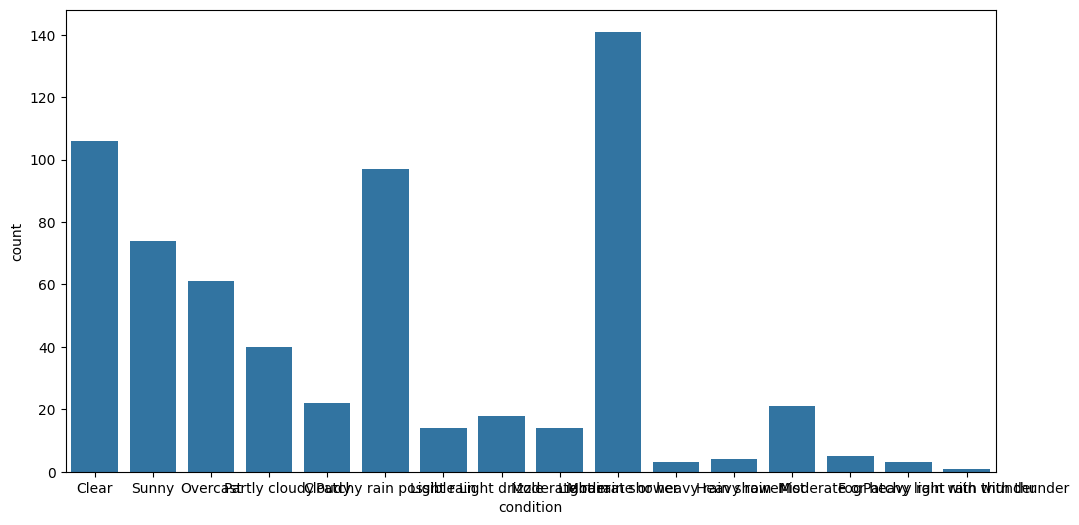

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='condition')

In [25]:
# The countplot's x axis is not really visible, but, the different values are in order, so we can see them with .unique to see their position in the plot.
df['condition'].unique()

array(['Clear', 'Sunny', 'Overcast', 'Partly cloudy', 'Cloudy',
       'Patchy rain possible', 'Light rain', 'Light drizzle',
       'Moderate rain', 'Light rain shower',
       'Moderate or heavy rain shower', 'Heavy rain', 'Mist', 'Fog',
       'Moderate or heavy rain with thunder',
       'Patchy light rain with thunder'], dtype=object)

Just as a curiosity, we'll get the scatter plot between the temperature and the wind.

There seems to be an underlying pattern, although not very noticeable.

What is possible to infer: Low temperature - Low wind velocity

Regarding high temperature, it is not possible to infer anything, due to the heterogeneous distribution.

<Axes: xlabel='temp_c', ylabel='wind_kph'>

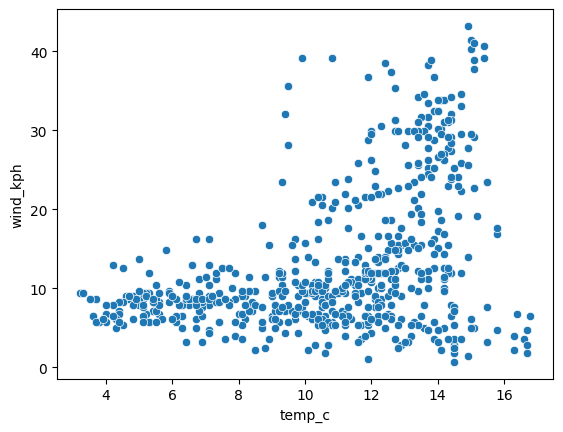

In [27]:
sns.scatterplot(data=df, x='temp_c', y='wind_kph')

Now, I want to study the weather conditions for each hour, and for each day.

<Axes: xlabel='temp_c', ylabel='hour_of_day'>

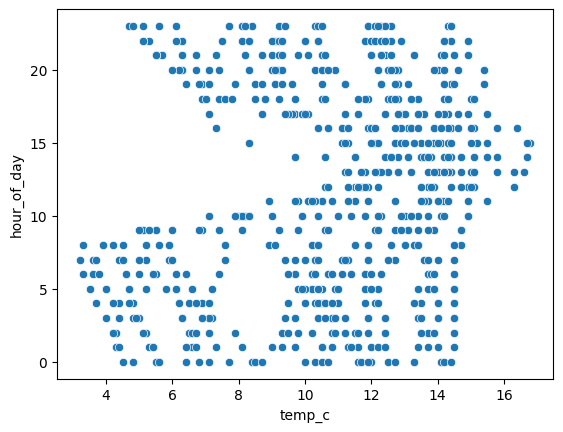

In [34]:
sns.scatterplot(data=df, x='temp_c', y='hour_of_day')

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_20984\1593202076.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='temp_c', y='day', palette='bright')


<Axes: xlabel='temp_c', ylabel='day'>

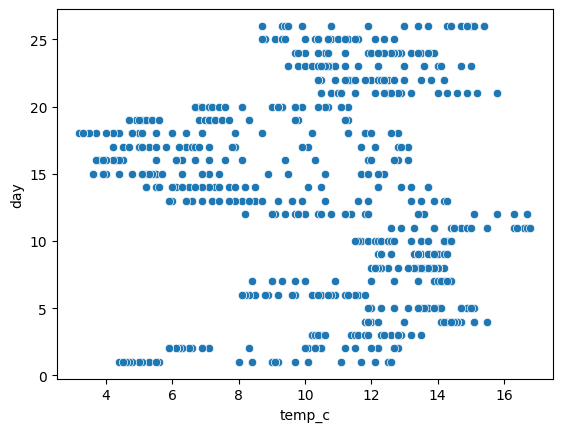

In [35]:
sns.scatterplot(data=df, x='temp_c', y='day', palette='bright')

For the hour of the day, there is not any pattern. However, we can see that, at the beginning of the month, it was warmer on average, then it got colder, and, at the end of the month, it got warmer again.

We can infer that most days were colder due to the low uv exposure.

<Axes: xlabel='uv', ylabel='count'>

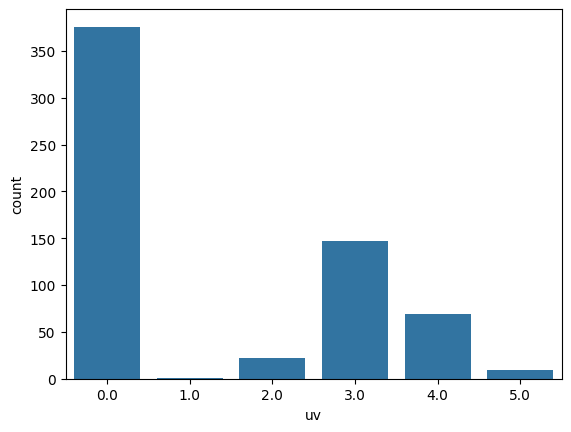

In [45]:
sns.countplot(data=df, x='uv')

The median wind velocity was 10 kilometers per hour. For that velocity, the wind chill parameter was heterogeneous. What we can infer from the graph below is that, at higher velocities, there is a little bit of an increase in wind chill, though the relationship isn't linear.

<Axes: xlabel='wind_kph', ylabel='windchill_c'>

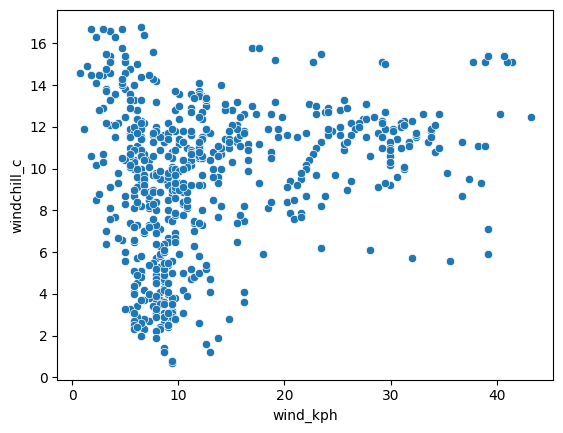

In [52]:
sns.scatterplot(data=df, x='wind_kph', y='windchill_c')

Winter time and Portugal is a humid country, so it makes sense the higher level of humidity.

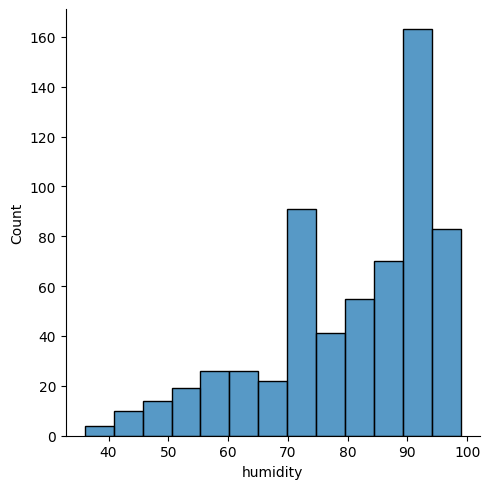

In [55]:
sns.displot(data=df, x='humidity', kind='hist')

From the density plot and the value count, it seems that the maximum value for visibility is 10 (capped at 10).

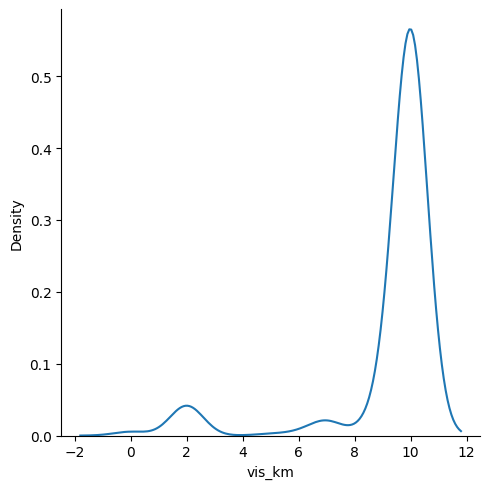

In [56]:
sns.displot(data=df, x='vis_km', kind='kde')

In [57]:
df['vis_km'].value_counts()

vis_km
10.0    523
2.0      39
9.0      31
7.0      17
0.0       5
6.0       3
8.3       2
5.0       2
6.7       2
Name: count, dtype: int64

We can study the influence of temperature on the chance of raining, or better yet, how raining affects the temperature.

<Axes: xlabel='temp_c', ylabel='Count'>

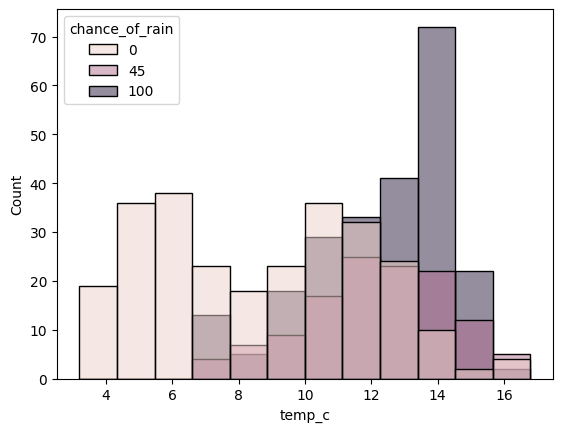

In [59]:
sns.histplot(data=df, x='temp_c', hue='chance_of_rain')

In [62]:
df.groupby('chance_of_rain')['temp_c'].mean()

chance_of_rain
0       8.695849
45     12.191129
100    12.328511
Name: temp_c, dtype: float64

As we can see, the higher the chance of raining, the higher the temperature.

<Axes: xlabel='dewpoint_c', ylabel='Count'>

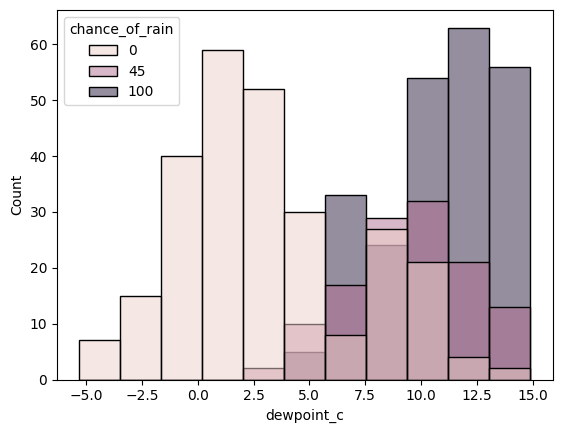

In [67]:
sns.histplot(data=df, x='dewpoint_c', hue='chance_of_rain')

<Axes: xlabel='humidity', ylabel='Count'>

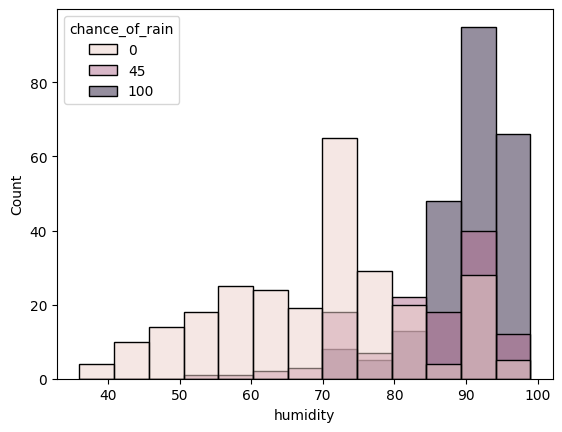

In [68]:
sns.histplot(data=df, x='humidity', hue='chance_of_rain')

<Axes: xlabel='humidity', ylabel='dewpoint_c'>

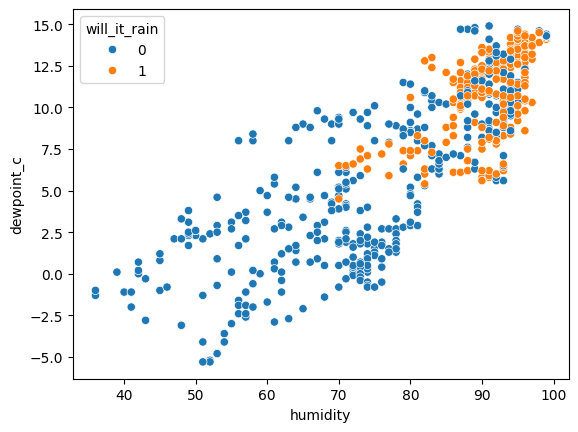

In [72]:
sns.scatterplot(data=df, x='humidity', y='dewpoint_c', hue='will_it_rain')

Since the Dew point temperature is the temperature at which air becomes saturated with water vapor, it makes sense why the relationship with humidity is almost linear.

As we see with the will_it_rain, the higher the humidity and dewpoint, the more likely it is to rain.

<Axes: xlabel='humidity', ylabel='temp_c'>

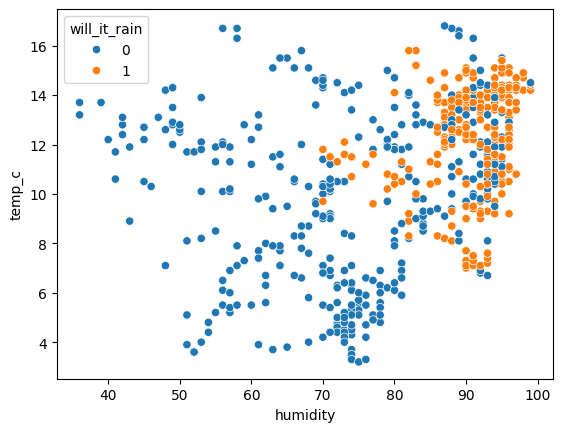

In [73]:
sns.scatterplot(data=df, x='humidity', y='temp_c', hue='will_it_rain')

Temperature is nota good indicative of the raining probability.

In [36]:
df.columns #https://www.weatherapi.com/docs/

Index(['temp_c', 'condition', 'wind_kph', 'wind_degree', 'wind_dir',
       'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'windchill_c',
       'dewpoint_c', 'will_it_rain', 'vis_km', 'uv', 'hour_of_day', 'day',
       'chance_of_rain'],
      dtype='object')